**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing datset and creating dataframe**

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(f'Dimensions of test dataset : {test_df.shape}')
print(f'Dimensions of train dataset : {train_df.shape}')

Dimensions of test dataset : (418, 11)
Dimensions of train dataset : (891, 12)


**Handling null values**

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.drop(columns = ['Name', 'Cabin', 'Ticket'], inplace = True)
train_df.drop(columns = ['Name', 'Cabin', 'Ticket'], inplace = True)

In [8]:
test_df['Age'].mean()

30.272590361445783

**Replacing null values with mean in age column**

In [9]:
test_df['Age'].fillna(int(test_df['Age'].mean()), inplace = True)
train_df['Age'].fillna(int(train_df['Age'].mean()), inplace = True)

In [10]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [11]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [12]:
train_df.fillna(train_df['Embarked'].mode().values[0], inplace = True)
test_df.fillna(round(test_df.Fare.mean(),4), inplace = True)

**Handling duplicates**

In [13]:
print(f'Number of duplicated in train dataframe : {train_df.duplicated().sum()}')
print(f'Number of duplicates in test dataframe : {test_df.duplicated().sum()}')

Number of duplicated in train dataframe : 0
Number of duplicates in test dataframe : 0


There are no duplicate values in train and test dataframe

**Data vizualisation and EDA**

<Axes: >

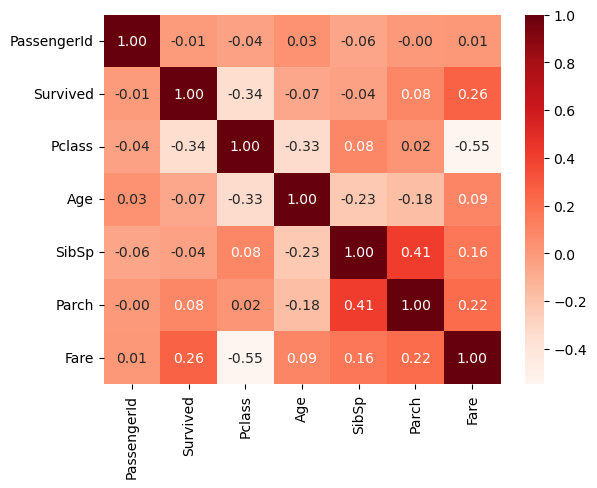

In [14]:
corr = train_df.corr()
sns.heatmap(corr, cmap = 'Reds', annot = True, fmt = '.2f')

**Spliting train dataframe**

In [15]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [16]:
print(X.shape)
print(y.shape)

(891, 8)
(891,)


**Lable encoding**

In [17]:
train_df = pd.get_dummies(train_df, prefix=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, prefix=['Sex', 'Embarked'])

In [18]:
X = pd.get_dummies(X, prefix = ['Sex', 'Embarked'])

**Standar Scalar**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X = scaler.fit_transform(X)
test_df = scaler.fit_transform(test_df)

**Train test split**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
print(f'Dimensions of X_train : {X_train.shape}')
print(f'Dimensions of X_test : {X_test.shape}')
print(f'Dimensions of y_train : {y_train.shape}')
print(f'Dimensions of y_test : {y_test.shape}')

Dimensions of X_train : (712, 11)
Dimensions of X_test : (179, 11)
Dimensions of y_train : (712,)
Dimensions of y_test : (179,)


**Modelling**

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [25]:
print(f'Dimension of y_pred : {y_pred.shape}')

Dimension of y_pred : (179,)


**Model Evaluation**

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
print(f'Accuracy score : {round(accuracy_score(y_pred, y_test), 2)}')
print(f'f1-score : {round(f1_score(y_pred, y_test), 2)}')

Accuracy score : 0.78
f1-score : 0.71


In [28]:
print("Classification report matrix : \n", classification_report(y_pred, y_test))

Classification report matrix : 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       117
           1       0.65      0.77      0.71        62

    accuracy                           0.78       179
   macro avg       0.76      0.78      0.76       179
weighted avg       0.79      0.78      0.78       179



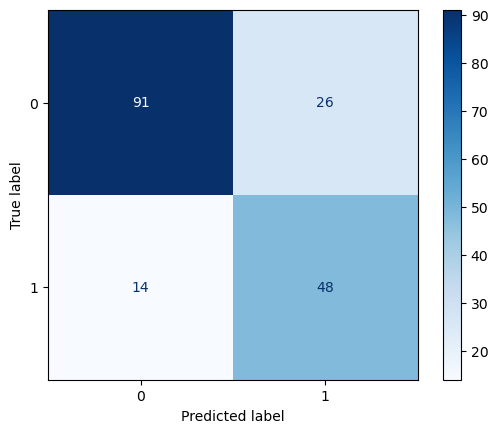

In [31]:
dt_cm = confusion_matrix(y_pred, y_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,display_labels=dt.classes_)
disp.plot(cmap= 'Blues')
plt.show()

In [30]:
dt.classes_

array([0, 1], dtype=int64)